In [1]:
"""
*****************************************************************************
Import necessary libraries and packages 
*****************************************************************************
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [2]:
"""
*****************************************************************************
Load Data
*****************************************************************************
"""
train_data = pd.read_csv('D:\ML Projects\Loan Predictor\\train.csv')
test_data = pd.read_csv('D:\ML Projects\Loan Predictor\\test.csv')
pd.set_option('display.max_columns', None)
train_data.head()


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

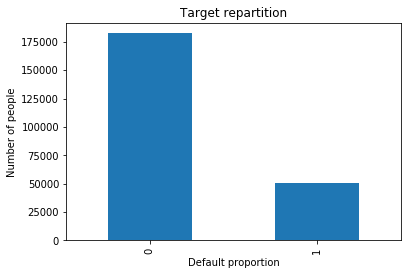

No of row in both categories for target attribute: 
 0    182543
1     50611
Name: loan_default, dtype: int64


In [4]:
"""
*****************************************************************************
Analyze the details of Data
*****************************************************************************
"""
fig=plt.figure()
axi=plt.axes()
result = train_data['loan_default']
plt.title('Target repartition')
axi = axi.set(xlabel='Default proportion', ylabel='Number of people')
result.value_counts().plot.bar()
plt.show()

print("No of row in both categories for target attribute: \n {}".format(train_data["loan_default"].value_counts()))



### Visualizing the Distrubution of Target column
* On Visualising the dataseyt we can observe that the both values are in ratio 1:4
* so we need to over sample the minority category after preprocessing as there is a imbalance in dataset

### Analysing the NaN values in the data set

In [5]:
"""
*****************************************************************************
Analyse the amount of null values present in Data
*****************************************************************************
"""
nan_count = train_data.isnull().sum()

nan_percentage = (nan_count / len(train_data))*100

nan_df=pd.concat([nan_percentage], axis=1)
nan_df=nan_df.rename(columns={0:'Percentage'})
nan_df=nan_df[nan_df.Percentage != 0]
nan_df=nan_df.sort_values(by='Percentage',ascending=False)

print(nan_df)

                 Percentage
Employment.Type    3.285811


## Data Preprocessing

### Dropping Columns that might or might not be available during predction
Some Columns might not be available for some cases, so dropping them to build model based on data that can be relied

In [6]:
# Dropping Columns
def drop_col(data_set):
    Cols = ['disbursed_amount','asset_cost','DisbursalDate','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT']
    data_set = data_set.drop(Cols, axis = 1)
    return data_set

### Replacing the NaN columns value with better replacement

In [7]:
def replace_nan(upd_data,col_name,rep_val):
    upd_data[col_name] = upd_data[col_name].replace(np.nan,rep_val)

### Feature Engineering

In [8]:
"""
*****************************************************************************
Convert Data as part of feature engineering
*****************************************************************************
"""
def field_conversion(data_set):
    now = pd.Timestamp('now')
    data_set['Date.of.Birth'] = pd.to_datetime(data_set['Date.of.Birth'], format='%d-%m-%y')
    data_set['Date.of.Birth'] = data_set['Date.of.Birth'].where(data_set['Date.of.Birth'] < now, data_set['Date.of.Birth'] -  np.timedelta64(100, 'Y'))
    data_set['Age'] = (now - data_set['Date.of.Birth']).astype('<m8[Y]')
    data_set=data_set.drop('Date.of.Birth',axis=1)
    return data_set
def period_con(data_set,cols):
    for ind in data_set.index:
        for c in cols:
            fin = 0
            val = data_set[c][ind]
            val = str(val)
            val_lst = val.split()
            yrs = val_lst[0]
            yrs = yrs.split('yrs')
            fin = int(yrs[0])*12
            mon = val_lst[-1]
            mon = mon.split('mon')
            fin = int(mon[0])+fin
            data_set[c][ind] = fin

### Preprocess function execution

In [9]:
def preprocess(data):
    #Drop Column
    upd_data = drop_col(data)
    #Replace Column
    replace_nan(upd_data,'Employment.Type','Unemployed')
    #Field Conversion 
    upd_data = field_conversion(upd_data)
    #Period Conversion
    cols = ['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']
    period_con(upd_data,cols)
    #Data type conversion
    upd_data = upd_data.astype({'AVERAGE.ACCT.AGE': int, 'CREDIT.HISTORY.LENGTH': int})
    return upd_data



In [10]:
updated_td = preprocess(train_data)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
from imblearn.over_sampling import RandomOverSampler
#Creating a list of all independ columns
independ_columns = [i for i in updated_td.columns if i != "loan_default"]
seed =3

#Seperating the independent and target attributes 
x = updated_td[independ_columns].copy()
y = updated_td["loan_default"].copy()
#Creating an instance of RandomOverSampler which will over sample the minority category equal to majority category 
over_sampler = RandomOverSampler(sampling_strategy = 'minority', random_state = seed)
x_sampled, y_sampled = over_sampler.fit_resample(x, y)

#Creating DataFrame from the over sampled data
data_sampled = pd.DataFrame(x_sampled, columns = independ_columns)
data_sampled["loan_default"] = y_sampled

updated_td = data_sampled

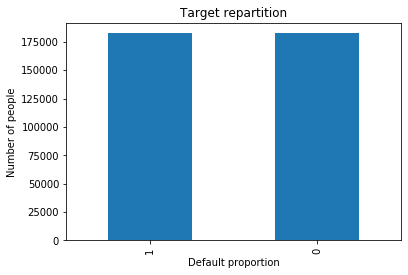

No of row in both categories for target attribute: 
 0    182543
1     50611
Name: loan_default, dtype: int64


In [26]:
"""
*****************************************************************************
Analyze the details of Data
*****************************************************************************
"""
fig=plt.figure()
axi=plt.axes()
result = updated_td['loan_default']
plt.title('Target repartition')
axi = axi.set(xlabel='Default proportion', ylabel='Number of people')
result.value_counts().plot.bar()
plt.show()

print("No of row in both categories for target attribute: \n {}".format(train_data["loan_default"].value_counts()))



In [12]:
#Correlation Matrix calculation
fac_corr = updated_td.corr()
fac_corr['loan_default'].sort_values(ascending = False)

loan_default                           1.000000
ltv                                    0.123117
State_ID                               0.057359
VoterID_flag                           0.051023
NO.OF_INQUIRIES                        0.048582
PRI.OVERDUE.ACCTS                      0.047271
UniqueID                               0.040770
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.038329
branch_id                              0.036390
supplier_id                            0.034313
Current_pincode_ID                     0.033596
Employee_code_ID                       0.023414
PAN_flag                               0.003232
SEC.OVERDUE.ACCTS                     -0.002864
SEC.CURRENT.BALANCE                   -0.007369
Driving_flag                          -0.007370
SEC.ACTIVE.ACCTS                      -0.007992
Passport_flag                         -0.009852
SEC.NO.OF.ACCTS                       -0.011067
AVERAGE.ACCT.AGE                      -0.028925
manufacturer_id                       -0

In [13]:
#updated_td.info()
#upd_data = updated_td
#updated_td = upd_data

### Encoding columns with binary objects

In [14]:
"""
*****************************************************************************
Label Encoding of categorical data
*****************************************************************************
"""
def labelenc(data_set):
    le = LabelEncoder()
    for cols in data_set:
        if data_set[cols].dtype == 'object':
            if len(list(data_set[cols].unique())) == 2:
                le.fit(data_set[cols])
                data_set[cols] = le.transform(data_set[cols])


### Encoding Columns with multiple objects

In [15]:
"""
*****************************************************************************
One hot Encoding of categorical data
*****************************************************************************
"""
def onehotenc(data_set):
    #Preprocess data with multiple values before one hot encoding
    data_set['PERFORM_CNS.SCORE.DESCRIPTION']= data_set['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'Not Scored' if 'Not Scored' in str(x) else x )
    #one hot encoding
    data_set = pd.get_dummies(data_set)
    data_set.dtypes.value_counts()
    return data_set


### Encoding categorical columsn in data set

In [16]:
def encoding_data(data_set):
    labelenc(data_set)
    data_set = onehotenc(data_set)
    return data_set


### Scaling the columns with huge variations in data

In [17]:
def srd_scaler(data_set,cols):
    data_set[cols] = StandardScaler().fit_transform(data_set[cols])
    return data_set

In [18]:
def enc_scal(data_set):
    data_set = encoding_data(data_set)
    cols = ['PERFORM_CNS.SCORE','PRI.CURRENT.BALANCE']
    data_set = srd_scaler(data_set,cols)
    return data_set


In [19]:
updated_td = enc_scal(updated_td)
updated_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365086 entries, 0 to 365085
Data columns (total 48 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   UniqueID                                                   365086 non-null  int64  
 1   ltv                                                        365086 non-null  float64
 2   branch_id                                                  365086 non-null  int64  
 3   supplier_id                                                365086 non-null  int64  
 4   manufacturer_id                                            365086 non-null  int64  
 5   Current_pincode_ID                                         365086 non-null  int64  
 6   State_ID                                                   365086 non-null  int64  
 7   Employee_code_ID                                           365086 non-null  int64  

In [20]:
"""
*****************************************************************************
Test Train data split
*****************************************************************************
"""
X =updated_td.drop('loan_default',axis=1)
y = updated_td['loan_default']  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [21]:
"""
*****************************************************************************
Logistic regression model
*****************************************************************************
"""
logisticRegr = LogisticRegression(C=1.0, class_weight=None,fit_intercept=True,max_iter=100)
logisticRegr.fit(X_train, y_train)

LogisticRegression()

## Performance metrics for the model
    True Positive - Predicted and default loan payment.
    False Positive - Predicted but no default.
    True Negative - Not predicted and also no default.
    False Negative - Not predicted but default loan payment.

* Our objective is to predict the customers who will default Loan payment.
* In this case we should minimize the False Negative as it will directly influence our success rate.
$$\begin{equation*}
Recall = {True Positive /(True Positive + False Negative)}
\end{equation*}$$

In [22]:
"""
*****************************************************************************
Random forest classifier and its accuracy
*****************************************************************************
"""
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=0)
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)
error = (1 - rf.score(X_test, y_test))*100
print('Score  = ',rf.score(X_test, y_test)*100, '%')

Score  =  92.05394152986506 %


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm = confusion_matrix(rf_predict, y_test,  labels = [1, 0])
cm_logistic = pd.DataFrame(cm, columns = ["Actual 1", "Actual 0"], index = ["Predicted 1", "Predicted 0"])
print(cm_logistic)
print("Accuracy:",metrics.accuracy_score(y_test, rf_predict))
print("Precision:",metrics.precision_score(y_test, rf_predict))
print("Recall:",metrics.recall_score(y_test, rf_predict))

             Actual 1  Actual 0
Predicted 1     51145      5245
Predicted 0      3458     49678
Accuracy: 0.9205394152986506
Precision: 0.906987054442277
Recall: 0.9366701463289563


In [24]:
updated_test = preprocess(test_data)
updated_test = enc_scal(updated_test)
rf_test_data = updated_test

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
"""
*****************************************************************************
Loan Prediction for Test Data with Random forest classifier
*****************************************************************************
"""
#rf_test_data =rf_test_data.drop('loan_default',axis=1)


rf_test_data['loan_default'] = rf.predict(rf_test_data)
rf_test_data.to_csv('result_rf.csv',mode = 'w', index=False)


### Result
    Loan defaulter value for the given test data is predicted and updated and exported aa a excel sheet